In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [153]:
%pip install --upgrade lazypredict

# **Librerias**

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyRegressor

# **Cargar y explorar datos**

In [116]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics/Project/Car_Performs/car_data.csv')

In [117]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [118]:
#city_mpg: Fuel efficiency in miles per gallon (mpg) for city driving, crucial for urban driving analysis.
#highway_mpg: Fuel efficiency in mpg for highway driving, ideal for comparing long-distance performance.
#combination_mpg: The combined fuel efficiency for both city and highway driving, a critical metric for overall vehicle performance.
#cylinders & displacement: Engine specifications that help understand a car's power and fuel consumption.
#drive: The type of drivetrain (e.g., FWD, AWD), key for determining the car's handling and terrain suitability.
#fuel_type: The type of fuel (e.g., gasoline, electric), important for environmental impact studies.
#make & model: Car manufacturer and model, enabling brand-specific analysis and comparison.
#year: The production year of the vehicle, useful for tracking trends and technological improvements over time.

**EDA**

In [119]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [120]:
df.describe(include='object')

,class,drive,fuel_type,make,model,transmission
count,550,550,550,550,550,550
unique,13,4,3,31,276,2
top,small sport utility vehicle,awd,gas,bmw,veloster,a
freq,157,215,546,72,12,467


In [121]:
df.isnull().sum()

,0
city_mpg,0
class,0
combination_mpg,0
cylinders,2
displacement,2
drive,0
fuel_type,0
highway_mpg,0
make,0
model,0


In [122]:
df_nulo_cylinders = df[df['cylinders'].isnull()]
df_nulo_cylinders

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
128,126,subcompact car,112,NaN,NaN,rwd,electricity,99,mitsubishi,i-miev,a,2016
175,121,subcompact car,112,NaN,NaN,rwd,electricity,102,mitsubishi,i-miev,a,2017


In [123]:
df['fuel_type'].value_counts()

,count
fuel_type,
gas,546
diesel,2
electricity,2


In [124]:
#Segmento A [SUV] ---------------------------------------(small sport utility vehicle, standard sport utility vehicle )
#Segmento B [Automóviles de Pasajeros] ------------------(minicompact car, subcompact car, compact car, midsize car, large car, minivan)
#Segmento C [Automóviles Especiales] --------------------(two seater)
#Segmento D [Estaciones de Carga] -----------------------(small station wagon, midsize station wagon)
#Segmento E [Camionetas] --------------------------------(standard pickup truck, small pickup truck)
#########################################################################################################################################
#Eliminar los valores nulos, y consigo los vehiculos de "fuel_type" disel.

In [125]:
df.value_counts('class')

,count
class,
small sport utility vehicle,157
subcompact car,85
compact car,83
two seater,69
midsize car,53
standard sport utility vehicle,34
minicompact car,21
large car,13
small station wagon,11


In [126]:
df['drive'].value_counts()

,count
drive,
awd,215
fwd,178
rwd,115
4wd,42


# **Pre-procesamiento de datos**

In [113]:
#Segmento A [SUV] ---------------------------------------(small sport utility vehicle, standard sport utility vehicle )
#Segmento B [Automóviles de Pasajeros] ------------------(minicompact car, subcompact car, compact car, midsize car, large car, minivan)
#Segmento C [Automóviles Especiales] --------------------(two seater)
#Segmento D [Estaciones de Carga] -----------------------(small station wagon, midsize station wagon)
#Segmento E [Camionetas] --------------------------------(standard pickup truck, small pickup truck)
#########################################################################################################################################
#Eliminar los valores nulos, y consigo los vehiculos de "fuel_type" disel.

In [114]:
#def transformar_clase(df):
#    class_mapping = {
#        'small sport utility vehicle': 'SUV',
#        'standard sport utility': 'SUV',
#        'minivan': 'Automóviles de Pasajeros',
#        'subcompact car': 'Automóviles de Pasajeros',
#        'compact car': 'Automóviles de Pasajeros',
#        'midsize car': 'Automóviles de Pasajeros',
#        'large car': 'Automóviles de Pasajeros',
#        'two seater': 'Automóviles Especiales',
#        'small station wagon': 'Estaciones de Carga',
#        'midsize station wagon': 'Estaciones de Carga',
#        'standard pickup truck': 'Camionetas',
#        'small pickup truck': 'Camionetas'
#    }

#    df['class'] = df['class'].replace(class_mapping)
#    return df

In [115]:
#transformar_clase(df)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,Automóviles de Pasajeros,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,Automóviles de Pasajeros,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,SUV,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,SUV,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,SUV,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,Automóviles de Pasajeros,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,Automóviles de Pasajeros,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,Automóviles de Pasajeros,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,Automóviles de Pasajeros,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


In [127]:
#Borrar nulos de la columna "cylinders"
df = df.dropna(subset=['cylinders'])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    object 
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    object 
 6   fuel_type        548 non-null    object 
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    object 
 9   model            548 non-null    object 
 10  transmission     548 non-null    object 
 11  year             548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [129]:
#Borrar la columna "fuel_type"
df = df.drop('fuel_type', axis=1)

In [130]:
#Funcion para llevar años a años de uso
def tiempo_uso(df, columna_ano, ano_actual=2024):

    df['year'] = ano_actual - df[columna_ano]
    return df

In [131]:
tiempo_uso(df, 'year')

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,36,mazda,6,m,10
1,26,midsize car,30,4.0,2.5,fwd,37,mazda,6,a,10
2,25,small sport utility vehicle,27,4.0,2.5,fwd,31,mazda,cx-5 2wd,a,10
3,26,small sport utility vehicle,29,4.0,2.0,fwd,34,mazda,cx-5 2wd,m,10
4,26,small sport utility vehicle,28,4.0,2.0,fwd,32,mazda,cx-5 2wd,a,10
...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.0,2.0,awd,33,bmw,430i xdrive gran coupe,a,0
546,21,midsize car,24,6.0,3.0,rwd,29,bmw,840i gran coupe,a,0
547,21,midsize car,24,6.0,3.0,awd,29,bmw,840i xdrive gran coupe,a,0
548,17,midsize car,19,8.0,4.4,awd,24,bmw,m850i xdrive gran coupe,a,0


In [132]:
#Funcion para codificar variables categoricas
def label_encoder(df, columna):
    label_encoder = LabelEncoder()
    df[columna] = label_encoder.fit_transform(df[columna])
    return df

In [133]:
df = label_encoder(df, 'transmission')
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,36,mazda,6,1,10
1,26,midsize car,30,4.0,2.5,fwd,37,mazda,6,0,10
2,25,small sport utility vehicle,27,4.0,2.5,fwd,31,mazda,cx-5 2wd,0,10
3,26,small sport utility vehicle,29,4.0,2.0,fwd,34,mazda,cx-5 2wd,1,10
4,26,small sport utility vehicle,28,4.0,2.0,fwd,32,mazda,cx-5 2wd,0,10


In [134]:
df = label_encoder(df, 'class')
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,fwd,36,mazda,6,1,10
1,26,2,30,4.0,2.5,fwd,37,mazda,6,0,10
2,25,7,27,4.0,2.5,fwd,31,mazda,cx-5 2wd,0,10
3,26,7,29,4.0,2.0,fwd,34,mazda,cx-5 2wd,1,10
4,26,7,28,4.0,2.0,fwd,32,mazda,cx-5 2wd,0,10


In [135]:
df = label_encoder(df, 'drive')
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,36,mazda,6,1,10
1,26,2,30,4.0,2.5,2,37,mazda,6,0,10
2,25,7,27,4.0,2.5,2,31,mazda,cx-5 2wd,0,10
3,26,7,29,4.0,2.0,2,34,mazda,cx-5 2wd,1,10
4,26,7,28,4.0,2.0,2,32,mazda,cx-5 2wd,0,10


In [136]:
df = label_encoder(df, 'make')
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,36,19,6,1,10
1,26,2,30,4.0,2.5,2,37,19,6,0,10
2,25,7,27,4.0,2.5,2,31,19,cx-5 2wd,0,10
3,26,7,29,4.0,2.0,2,34,19,cx-5 2wd,1,10
4,26,7,28,4.0,2.0,2,32,19,cx-5 2wd,0,10


In [137]:
df = label_encoder(df, 'model')
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,36,19,15,1,10
1,26,2,30,4.0,2.5,2,37,19,15,0,10
2,25,7,27,4.0,2.5,2,31,19,74,0,10
3,26,7,29,4.0,2.0,2,34,19,74,1,10
4,26,7,28,4.0,2.0,2,32,19,74,0,10


In [97]:
#df = label_encoder(df, 'fuel_type')
#df.head(5)

In [138]:
df_corr = df.corr()

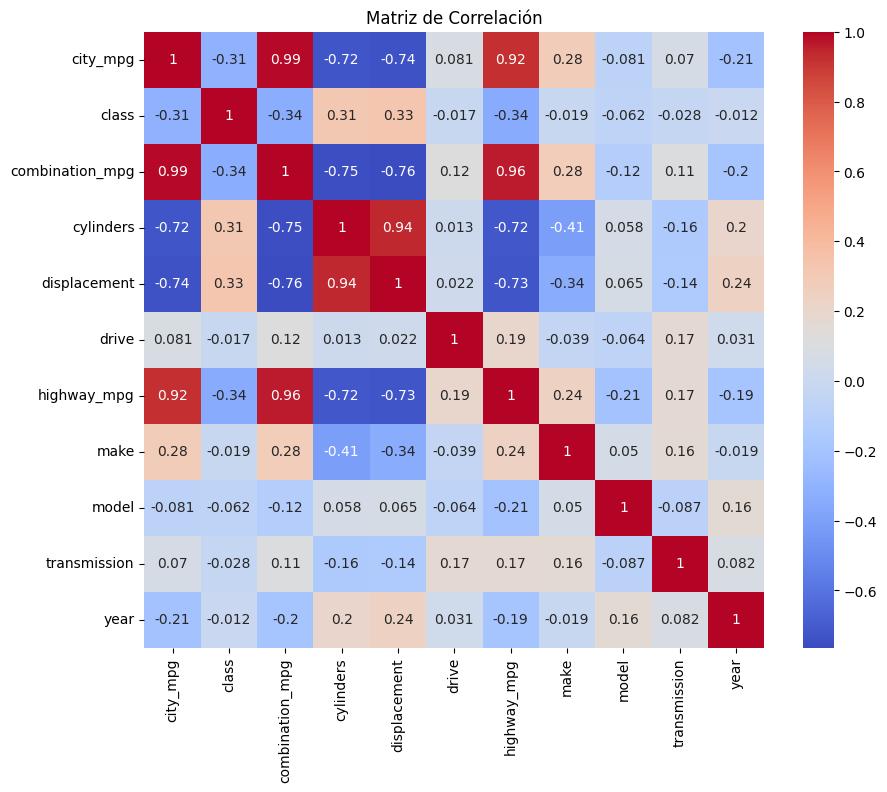

In [139]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [140]:
target_corr = df_corr['combination_mpg'].sort_values(ascending=False)
print(target_corr)

combination_mpg    1.000000
city_mpg           0.987336
highway_mpg        0.963011
make               0.280401
drive              0.120203
transmission       0.107246
model             -0.119401
year              -0.198222
class             -0.336457
cylinders         -0.750464
displacement      -0.763750
Name: combination_mpg, dtype: float64


In [141]:
X = df.drop('combination_mpg', axis=1)
y = df['combination_mpg']

In [142]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelos**

**LinearRegression**

In [144]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [145]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
  modelo_score = modelo.score(X_train, y_train)
  lr_r2 = r2_score(y_test, modelo.predict(X_test))
  mae = mean_absolute_error(y_test, modelo.predict(X_test))
  mse = mean_squared_error(y_test, modelo.predict(X_test))
  rmse = np.sqrt(mse)
  print(f'Score: {modelo_score}')
  print(f'R2: {lr_r2}')
  print(f'mean_absolute_error: {mae}')
  print(f'mean_squared_error: {mse}')
  print(f'R_mean_squared_error: {rmse}')

In [146]:
evaluar_modelo(modelo_lr, X_train, y_train, X_test, y_test)

Score: 0.9955057530168929
R2: 0.9949034402408948
mean_absolute_error: 0.30280508877149376
mean_squared_error: 0.13671247771663794
R_mean_squared_error: 0.3697465046712923


In [147]:
lr_y_pred = modelo_lr.predict(X_test)

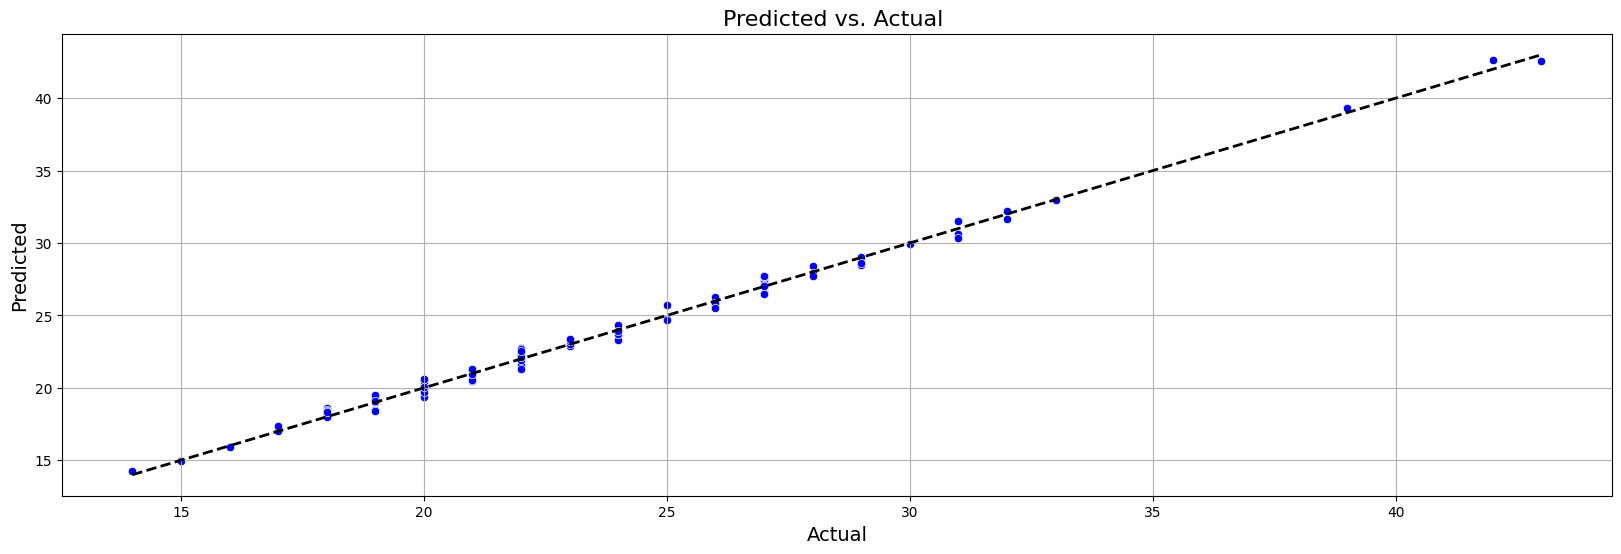

In [148]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=lr_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual ', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.grid(True)
plt.show()

**RandomForestRegressor**

In [149]:
modelo_rfr = RandomForestRegressor()
modelo_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [150]:
evaluar_modelo(modelo_rfr, X_train, y_train, X_test, y_test)

Score: 0.9986095222520419
R2: 0.9897974742433205
mean_absolute_error: 0.2791818181818182
mean_squared_error: 0.27367727272727266
R_mean_squared_error: 0.5231417329245227


In [151]:
rfr_y_pred = modelo_rfr.predict(X_test)

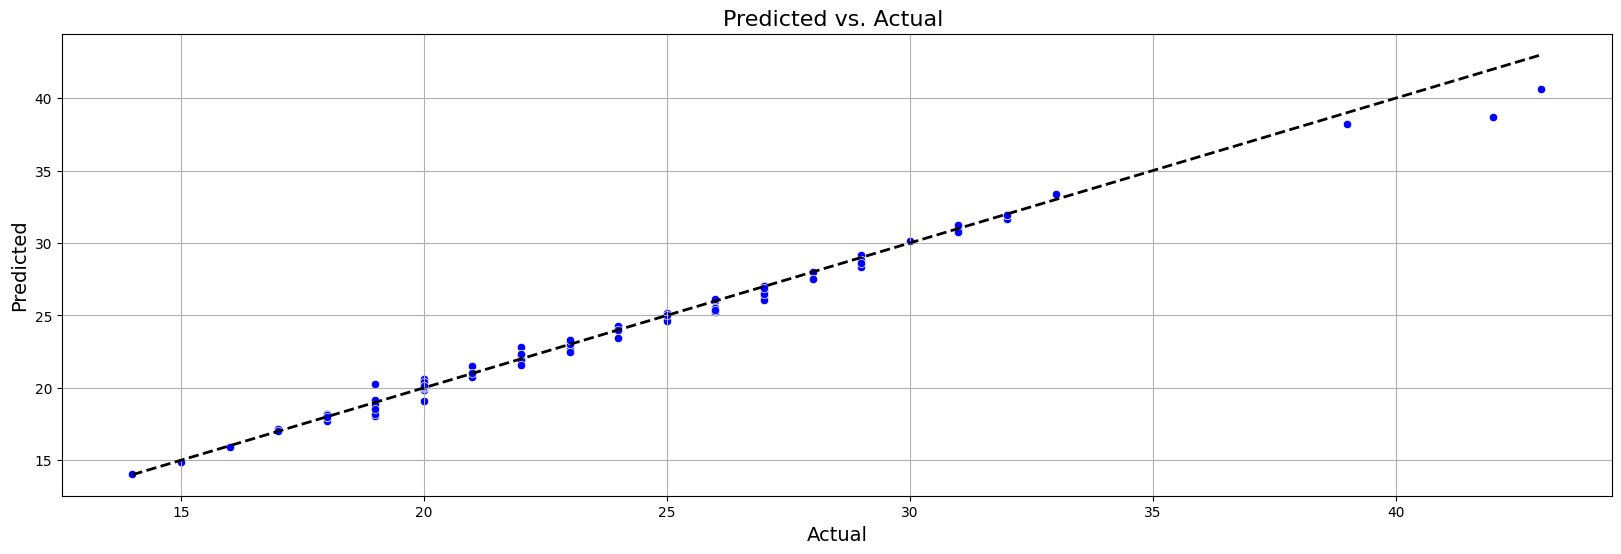

In [152]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=rfr_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual ', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.grid(True)
plt.show()

**from lazypredict**

In [157]:
modelo_lazy = LazyRegressor()
modelo_lazy, predicciones = modelo_lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:03<00:00, 12.59it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 10
[LightGBM] [Info] Start training from score 23.712329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [158]:
print(modelo_lazy)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.99       1.00  0.36        0.26
OrthogonalMatchingPursuitCV                  0.99       1.00  0.37        0.03
LassoCV                                      0.99       0.99  0.37        0.19
ElasticNetCV                                 0.99       0.99  0.37        0.17
LassoLarsCV                                  0.99       0.99  0.37        0.04
LarsCV                                       0.99       0.99  0.37        0.08
RidgeCV                                      0.99       0.99  0.37        0.02
Ridge                                        0.99       0.99  0.37        0.01
BayesianRidge                                0.99       0.99  0.37        0.02
RANSACRegressor                              0.99       0.99  0.37        0.02
LassoLarsIC                                  0.99   